In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import pickle
import seaborn as sns

In [15]:
# Import the CSV file
df = pd.read_csv("cost_revenue_dirty.csv")
df

,Rank,Release Date,Movie Title,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"
...,...,...,...,...,...,...
5386,2950,10/8/2018,Meg,"$15,000,000",$0,$0
5387,126,12/18/2018,Aquaman,"$160,000,000",$0,$0
5388,96,12/31/2020,Singularity,"$175,000,000",$0,$0
5389,1119,12/31/2020,Hannibal the Conqueror,"$50,000,000",$0,$0


In [16]:
# Delete the 'Rank', 'Release Date', 'Movie Title' , 'Domestic Gross ($)' columns
df = df.drop(['Rank', 'Release Date', 'Movie Title' , 'Domestic Gross ($)'], axis=1)
df

,Production Budget ($),Worldwide Gross ($)
0,"$110,000","$11,000,000"
1,"$385,907",$0
2,"$200,000","$8,000,000"
3,"$100,000","$3,000,000"
4,"$245,000","$22,000,000"
...,...,...
5386,"$15,000,000",$0
5387,"$160,000,000",$0
5388,"$175,000,000",$0
5389,"$50,000,000",$0


In [17]:
# Clean the format of the columns
df['Production Budget ($)'] = df['Production Budget ($)'].str.replace(',', '').str.replace('$', '', regex=False)
df['Worldwide Gross ($)'] = df['Worldwide Gross ($)'].str.replace(',', '').str.replace('$', '', regex=False)

# Convert the columns to a numerical data type
df['Production Budget ($)'] = pd.to_numeric(df['Production Budget ($)'])
df['Worldwide Gross ($)'] = pd.to_numeric(df['Worldwide Gross ($)'])
df

,Production Budget ($),Worldwide Gross ($)
0,110000,11000000
1,385907,0
2,200000,8000000
3,100000,3000000
4,245000,22000000
...,...,...
5386,15000000,0
5387,160000000,0
5388,175000000,0
5389,50000000,0


In [18]:
# Drop any rows with missing data
df.dropna(inplace=True)

# Drop any row with a value of zero in the "Production Budget ($)" column
df = df.drop(df[(df['Production Budget ($)'] == 0) | (df['Worldwide Gross ($)'] == 0)].index)

df

,Production Budget ($),Worldwide Gross ($)
0,110000,11000000
2,200000,8000000
3,100000,3000000
4,245000,22000000
5,3900000,9000000
...,...,...
5378,55000000,376856949
5379,40000000,166893990
5380,185000000,561137727
5381,175000000,140012608


In [19]:
# Declare X , y
X = df[['Production Budget ($)']]
y = df['Worldwide Gross ($)']

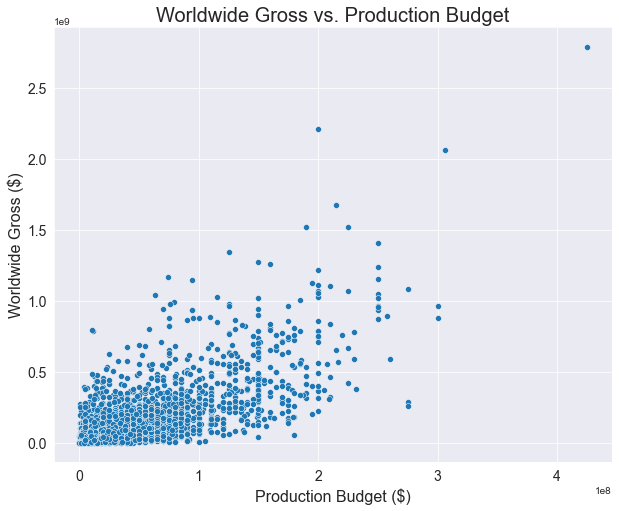

In [20]:
# Create a scatter plot of the "Production Budget ($)" and "Worldwide Gross ($)" columns
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Production Budget ($)', y='Worldwide Gross ($)', data=df)

# Set the plot title and axis labels
plt.title('Worldwide Gross vs. Production Budget', fontsize=20)
plt.xlabel('Production Budget ($)', fontsize=16)
plt.ylabel('Worldwide Gross ($)', fontsize=16)

# Set the tick label size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set the grid
plt.grid(True)

# Show the plot
plt.show()

In [21]:
# Perform linear regression on the "Production Budget ($)" and "Worldwide Gross ($)" columns
reg = LinearRegression().fit(X, y)

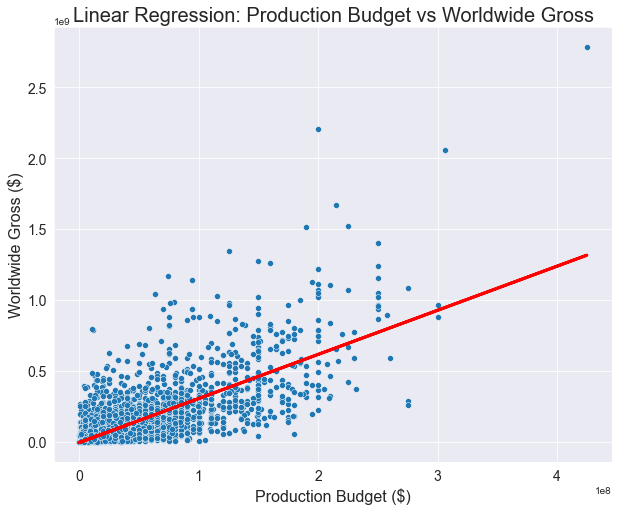

In [22]:
# Create a scatter plot of the data
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Production Budget ($)', y='Worldwide Gross ($)', data=df)

# Plot the linear regression line on the scatter plot
plt.plot(X, reg.predict(X), color='red', linewidth=3)

# Set the plot title and axis labels
plt.title('Linear Regression: Production Budget vs Worldwide Gross', fontsize=20)
plt.xlabel('Production Budget ($)', fontsize=16)
plt.ylabel('Worldwide Gross ($)', fontsize=16)

# Set the tick label size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Set the grid
plt.grid(True)

# Show the plot
plt.show()

In [23]:
# Use the model to make predictions
budgets = np.array([[100000000], [200000000], [300000000]])
predictions = reg.predict(budgets)
print(predictions)

[3.03914726e+08 6.15065644e+08 9.26216562e+08]


C:\Users\ahmed\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [24]:
# Save the model using pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(reg, f)


In [25]:
print(reg.coef_ , " " , reg.intercept_ , " ", reg.score(X, y))

[3.11150918]   -7236192.729139626   0.5496485356985729
